# "WHY ARE ALL MY STUDENTS SICK?!" - A model

ModSim Project 2 - Mahima Beltur, HK Rho

## QUESTION: 
### What happens after the freshman flu first strikes?

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import random
import decimal

## Abstract
The goal of this model was to see the projection of the overall Olin community throughout first semester after being hit by the Freshman Plague and its delayed effects. This model was modified from the pre-existing SIR model by adding a fourth stock that represented a "weakened" population in between the infected and the recovered population. The weakened population had two directions to flow through: back to the infected stock, or to the recovered stock.


## Introduction
We have been at Olin for about 2 months now, and something we've noticed is that at least one person we know has been sick ever since the freshman plague hit. This got us thinking, "Is this it? Is someone just always going to be sick now?" Aside from having to avoid contagious people in an effort to not fall victim to the plague (which seriously hurts building friendships), being caught by the plauge will often mean that you have to miss classes and just makes all the students go:
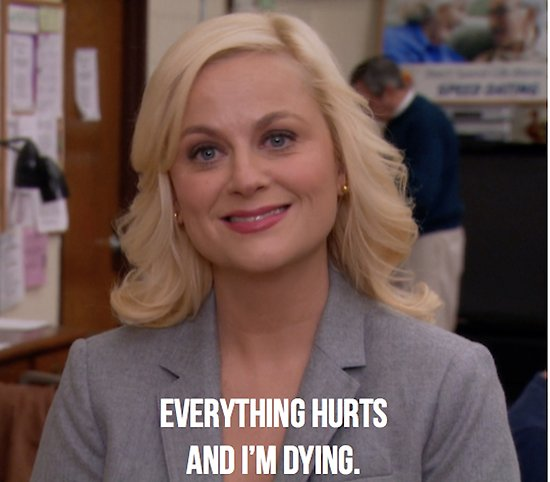

We wanted to understand variation in the number of sick students at Olin at any one time and how that number fluctuates over the course of the semester. Aside from an explanation to why everyone seems to be sick, we thought that finding a periodic peaks in the number of sick people would help administrating staff and the faculty understand why people kept turning things in late and why people keep skipping classes (and hopefully, also make them assign less homework).

## Explanation and Implementation of the code

We decided to approach the set up of our model by making a slight change to the standard SIR model. The SIR model assumes that once a person recovers from a sickness, they are immune to it and will never again fall ill from the same virus. While this is technically true that the same individual will never again be infected by the same strain of a virus, we felt that it would be very important to take into account that there are millions of other strains of viruses to be infected by. How else can we explain the phenomenon of the same people getting sick over and over again? 

We also realised that people who are ill do not just automatically return to full capacity upon recovery. There is a period of time where their immune system is weakened where they are more susceptible to other bacteria and viruses than others would be. We decied to add a fourth stock to represent these people. 

In [2]:
#create state variables that gets updated through iterations defined inside the update function
#units = number of people
#total number of people = 385 (total number of Olin students)

state = State(
    
    #susceptible 
    s = 365, 
    
    #infected (carrying viruses coming into university after summer causing everyone else get sick)
    i = 20,
    
    #weakened immune system
    w = 0, 
    
    #recovered 
    r = 0)


,values
s,365
i,20
w,0
r,0


All of our system variables, which we treat as constants in our differential equations in update_func later, are probabilities. We researched the proportion of people that fall ill due to the flu every year as well as the duration of time it takes for people to display symptoms of illnesses and recover from them. We then applied these values to the smaller sample size of Olin students. We found out that approximately 20% of people in the US contract the flu each year, and that it takes about four days for the symptoms to be felt. We interpreted this as being a 0.2 * 0.25 chance of showing symptoms on any given day, which we consider to be our infection_rate. We followed the same methodology for the rest of our system variables. 

We also realised that most of our statistics come in ranges and that one individual value might not apply for every strain of the virus and for every individual. By running the simulation with different system variables each time, the random function was able to take effect by randomly selecting system variables from given boundaries. This aspect was added to reflect the unpredictable behavior of the rate of sickness and the effect of it on each individual at different times.

In [3]:
#system variable defining constants for equations in update_func
#all units in probabilities of being affected in a particular way on that day
#all system variables are random to account for the fact that not everyone reacts in the same way.
system = System(
    #infection rate defined by: (probability of showing symptoms on any one day) * (probability of being infected)
        infection_rate = float(decimal.Decimal(random.randrange(25, 50))/100) * float(decimal.Decimal(random.randrange(5, 20))/100),
        vaccination_rate = .1, 
        reinfection_rate = float(decimal.Decimal(random.randrange(15, 40))/100), 
        recovery_rate = float(decimal.Decimal(random.randrange(10, 30))/100), 
        complete_recovery_rate = float(decimal.Decimal(random.randrange(1, 250))/1000),
        immunity_wearsoff = float(decimal.Decimal(random.randrange(90,100))/100), 
        t0 = 0 ,
        t_end = 116,
        dt = 1)

,values
infection_rate,0.0418
vaccination_rate,0.1000
reinfection_rate,0.1700
recovery_rate,0.1400
complete_recovery_rate,0.2400
immunity_wearsoff,0.9800
t0,0.0000
t_end,116.0000
dt,1.0000


The changes in each stock per time step(dt) were calculated from the flows going in and out of each stock. As an example, for the susceptible stock, there were three flows that directly influenced the change in the number of susceptibles. First was the flow from the susceptible to the infected; the second was the flow from the susceptibles to the weakened due to immunization; third was the from the recovered to the susceptibles due to the people with wore off immunization. Therefore, the change in susceptibles per time step =  - first flow - second flow + third flow. The same logic was applied for the immunized, weakened, and recovered stock.


To further describe the changes that influence the weakened stock, there are four flows. The first flow is from the infected to the weakened. The second flow is from the weakened to the recovered. The third flow is from the susceptible to the weakened due to the portion of the people who received vaccinations. The final flow is from the weakened to the infected due to the portion of the people who were not able to overcome the sickness and ended up with a worsened cold.


In [4]:
def update_function(state, t, system):

    unpack(system)
    
    #change in number of each stock during each iteration
    ds = (-(vaccination_rate) * state.s - (infection_rate)*(state.s-(vaccination_rate * state.s)) + immunity_wearsoff * state.r) 
    di = ((infection_rate) * (state.s-(vaccination_rate * state.s)) + (reinfection_rate)* (state.w) - (recovery_rate) * state.i) 
    dw = ((vaccination_rate) * state.s - (complete_recovery_rate) * state.w - (reinfection_rate) * state.w + (recovery_rate) *state.i) 
    dr = ((complete_recovery_rate) * state.w - immunity_wearsoff * state.r )
    
    #adding the current value of stock to the change in each one as defined above.
    s2 = state.s + ds 
    i2 = state.i + di
    w2 = state.w + dw
    r2 = state.r + dr
    
    #returning new state values for stocks
    state = State(s=s2, i=i2, w=w2, r=r2)
    return state

The reason why the system variables were defined twice in this program (one at the top of the code and the other inside the run simulation) was to make system variables change every time step(dt). By running the simulation with different system variables each time, the random function was able to take effect by randomly selecting system variables from given boundaries. This aspect was added to reflect the unpredictable behavior of the rate of sickness and the effect of it on each individual at different times.


In [5]:
#updates the function on loop from initial time to the end of the sample space.
def run_simulation(system, update):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    #makes a table with as many columns as variables in the state value
    frame = TimeFrame(columns=state.index)
    #sets first tow, the initial time, to the initial state value
    frame.row[t0] = state
    
    #loops update func for the duration of the time period
    for t in linrange(t0, t_end, dt):
        #assigns updated value to each new row
        frame.row[t+dt] = update(frame.row[t], t, system)
        #re-randomizing the system variables for each running of update_func
        system = System(
        infection_rate = float(decimal.Decimal(random.randrange(25, 50))/100)  * float(decimal.Decimal(random.randrange(5, 20))/100), 
        vaccination_rate = .1, 
        reinfection_rate = float(decimal.Decimal(random.randrange(15, 40))/100), 
        recovery_rate = float(decimal.Decimal(random.randrange(10, 30))/100), 
        complete_recovery_rate = float(decimal.Decimal(random.randrange(1, 250))/1000), 
        immunity_wearsoff = float(decimal.Decimal(random.randrange(10, 50))/100),
        t0 = 0 ,
        t_end = 116,
        dt = 1)
    
    return frame

In [6]:
results = run_simulation(system, update_function)
results.head()

,s,i,w,r
0.0,365,20,0,0
1.0,314.769,30.9313,39.3,0
2.0,272.413,43.9601,65.6003,3.0261
3.0,236.609,74.2704,57.7923,16.3284
4.0,212.232,88.0659,66.5786,18.1237


## Results

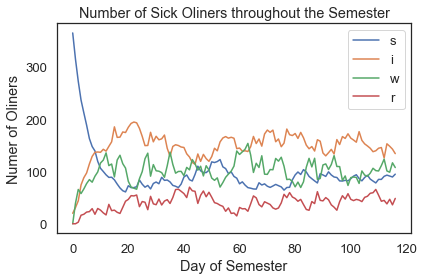

In [7]:
results.plot()
decorate(xlabel='Day of Semester', 
             ylabel='Numer of Oliners',
             title='Number of Sick Oliners throughout the Semester') 

After the first strike of the Freshman plague, the sickness seems to constantly be present. We noticed that the sickness seems to spike around three times throughout the projection of the graph, which lasts for one semester, and the time gap between them are around 30 days between Day 20 and Day 50, and and around 40 days between Day 50 and Day 90. While there are no obvious, major spikes after the first hit of the freshman plague, we still notice that nearly half the population is constantly sick. It is clear that the virus never really goes away and haunts us throughout the entire semester. Therefore, students should always be cautious about their health and self care: eat well, get plenty of sleep, stay hydrated, and excercise to keep your immune system strong so you're less likey to get sick.

Having said that, we find this model to be extremely innacurate due to the the assumptions we have made and the limitations that arise from it. Our two major assumptions were that a) Olin is, quite literally, a bubble in which we have no visitors or people interacting with outsiders and that b) everyone's immune system reacts the exact same during time step and conforms to the variables that we have set. 

The first assumption completely ignores the introduction of foreign viruses and bacterium into our microcosm and the effects it would have on our stocks and system values. The second assumption limits our model as we cannot map the effect of illesses on each individual. This means that our model expects Oliners' reactions to illnesses to be identical to that of the entire United States, which ignores Olin specific factors that can greatly influence outcomes. While our model can predict a general trend, it is oversimplified and therefore cannot be applied to every day life. So we guess you don't have to give us less homework. 
